In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle
import pandas as pd
import seaborn as sns
import scipy.ndimage as ndimage
from sklearn.metrics import mean_squared_error
import itertools

In [2]:
plt.rcParams["font.family"] = "Arial"   # 使用するフォント
plt.rcParams["font.size"] = 7 

In [6]:
def make_df(data_path,label,crop=20):
    df=pd.DataFrame()
    df["Actual"]=np.load(f"{data_path}/ans_{crop}.npy")
    df["Pred"]=np.load(f"{data_path}/pred_{crop}.npy")
    df["Label"]=label
    return df
    

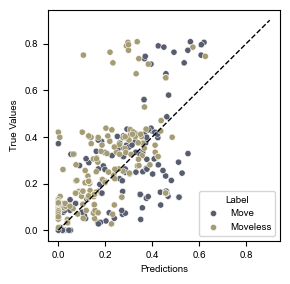

In [9]:
data_path_list=["./data/train_move/","./data/train_array/"]
label_list=["Move","Moveless"]
df=pd.concat([make_df(data_path_list[i],label=label_list[i],crop=10) for i in range(2)] ).reset_index(drop=True)
sns.set_palette("cividis",2)
plt.figure(figsize=(3, 3))
sns.scatterplot(data=df,x="Pred",y="Actual",hue="Label",s=20)
plt.plot([0 ,0.9],[0,0.9], '--', color='k',lw=1)

plt.ylabel('True Values')
plt.xlabel('Predictions')


plt.rcParams["svg.fonttype"] = "none"
plt.savefig("./Fig/Fig6_c.svg",transparent=True,dpi=300)

In [21]:


df=pd.DataFrame()

df["Mean Square Error"]=[0.02,0.045,0.023,0.025,0.040,0.027]

df["Correration"]=[0.73,0.46,0.62,0.56,0.29,0.38]

df["Number of input images"]=[20,20,10,10,5,5]


df["Kinetics"]=["with","without","with","without","with","without"]

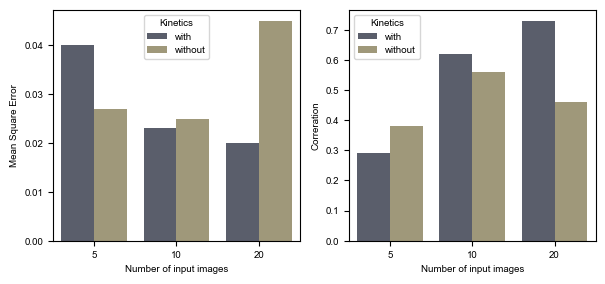

In [22]:
plt.figure(figsize=(7, 3))

plt.subplot(1,2,1)
sns.barplot(data=df,x="Number of input images",y="Mean Square Error",hue="Kinetics",palette="cividis")


plt.subplot(1,2,2)
sns.barplot(data=df,x="Number of input images",y="Correration",hue="Kinetics",palette="cividis")

plt.rcParams["svg.fonttype"] = "none"
plt.savefig("./Fig6_d.svg",transparent=True,dpi=300)


<Axes: xlabel='Number of input images', ylabel='Correration'>

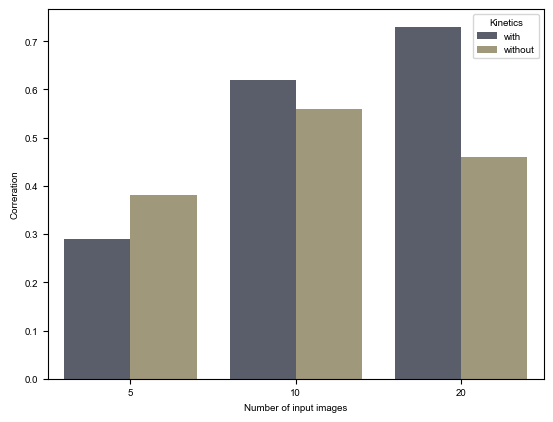

In [23]:
sns.barplot(data=df,x="Number of input images",y="Correration",hue="Kinetics",palette="cividis")